# Object recognition

![](https://www.researchgate.net/profile/Jasmin-Velagic/publication/328991586/figure/fig1/AS:750726502424577@1555998554376/Feature-matching-and-object-detection-using-ORB-a-BRISK-b-SIFT-c-or-SURF-d.ppm)

# [3D modeling](https://www.researchgate.net/publication/221156848_Markerless_Outdoor_Localisation_Based_on_SIFT_Descriptors_for_Mobile_Applications/figures?lo=1)

![](https://www.researchgate.net/profile/Robert-Laurini/publication/221156848/figure/fig2/AS:668989084688389@1536510835236/Extraction-of-SIFT-points-left-and-matching-to-the-3D-model-right-Only-the-points.ppm)

# [Gesture recognition](https://www.semanticscholar.org/paper/Hand-Gesture-Recognition-Using-SIFT-Features-on-Mahmud-Hasan/e05bf76b0d36a9ee95db73f1401ee080b8175698)

![](https://d3i71xaburhd42.cloudfront.net/e05bf76b0d36a9ee95db73f1401ee080b8175698/4-Figure4-1.png)


In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('E5cyffF7DNo')
#HTML('<iframe width="560" height="315" src="https://www.youtube.com/watch?v=E5cyffF7DNo" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

[Feature Detection and Description modul](https://docs.opencv.org/master/d5/d51/group__features2d__main.html)

[xfeatures2d](https://docs.opencv.org/master/d3/df6/namespacecv_1_1xfeatures2d.html)

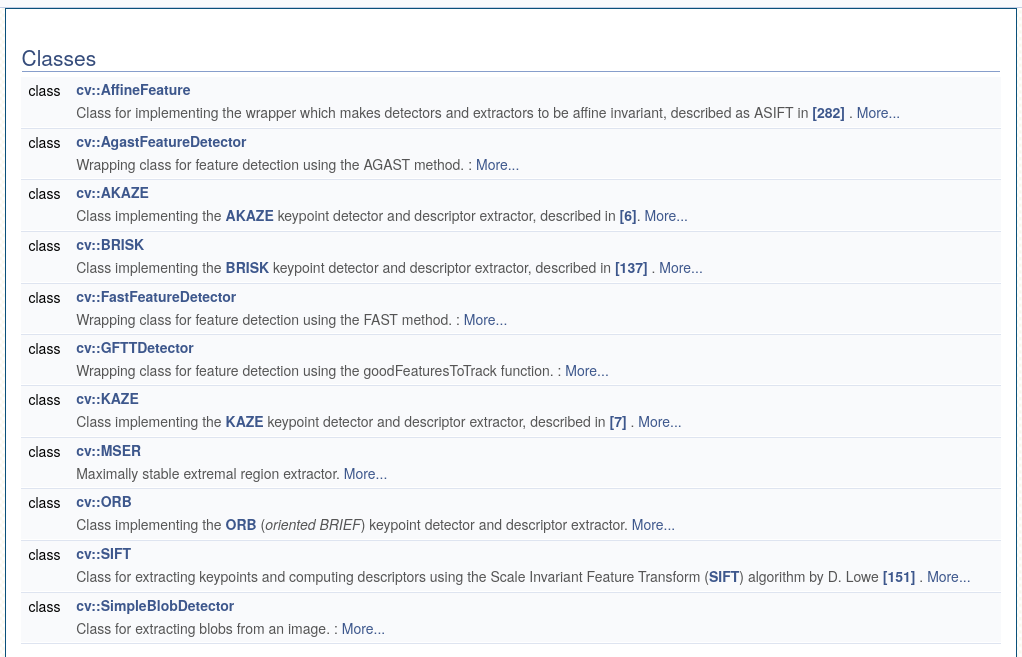

# [Harris corner detection](https://docs.opencv.org/master/dc/d0d/tutorial_py_features_harris.html)

![](https://docs.opencv.org/master/harris_region.jpg)

# [Scale-invariant feature transform **SIFT**](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html)
1. Scale-space

![](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/sift_dog.jpg)

2. Lokalizace

![](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/sift_local_extrema.jpg)

3. Odstranění nízko-kontrastních kandidátů pomocí Taylorova rozvoje.

4. Odstranění hran - DoG má silnou detekci hran.

5. Přiřazení orientace:
  
  výpočet velikostí a orientace gradientů
  
  vytvoření histogramu (36 intervalů) orientací (vážený velikostí gradientu a normální kruhovou distribucí),
  
  výběr orientace s největší četností a všech nad 80% prahem,
  
  vytvoření několika keypointů na stejné pozici s rozlišnou orientací.

6. Vytvoření deskriptoru:
  
  16x16 okolí rozděleno na 16 4x4,

  pro každý podblok vytvoří histogram orientací s 8 intervaly,

  histogramy tvoří 128 hodnot a k těm je přidáno několik měřených hodnot pro lepší robustnost oproti geometrickým a iluminačním změnám.

![](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/sift_keypoints.jpg)


# [Features from accelerated segment test **FAST**](https://en.wikipedia.org/wiki/Features_from_accelerated_segment_test)

Bresenhamuv kruh r = 3

Pokud je *N* kontinuálních pixelů tmavších nebo světlejších než pixel p, potom je p roh.

![](https://upload.wikimedia.org/wikipedia/commons/4/47/FAST_Corner_Detector.jpg)

# [Binary Robust Independent Elementary Features BRIEF](https://docs.opencv.org/master/dc/d7d/tutorial_py_brief.html)

Navzorkovat a porovnat intenzity -> binární string -> spočítat pomocí XOR hammingovu vzdálenost

![](https://gilscvblog.files.wordpress.com/2013/09/figure1.jpg)


# [Oriented FAST and Rotated BRIEF **ORB**](https://docs.opencv.org/master/d1/d89/tutorial_py_orb.html)

FAST algoritmus, ale multiscale a orientovaný

![](https://miro.medium.com/max/300/0*wGPpgnPImtwLb8NX.png)

BRIEF deskriptory

Jakmile je patch orotovaný tak začně silně klesat výkonost párování

Řešení: samplování pixelů, které dělá BRIEF orotovat podle zpočtené orientace.


# [Speeded Up Robust Features **SURF**](https://docs.opencv.org/master/df/dd2/tutorial_py_surf_intro.html)

SIFT aproximuje LoG pomocí DoG, SURF aproximuje LoG pomocí box filtru

![](https://docs.opencv.org/master/surf_boxfilter.jpg)

Orientace pomocí vlnkové transformace na kterou se aplikuje konvoluční okno v úhlovém prostoru.

![](https://docs.opencv.org/master/surf_orientation.jpg)

Deskriptor vytvořen pomocí vlnkové transformace, více odkaz v nadpise.

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [ ]:
# http://datahacker.rs/005-how-to-create-a-panorama-image-using-opencv-with-python/

def visualize(scale, *images):
  figsize = ( images[0].shape[0] / max(images[0].shape[:2]) * scale, images[0].shape[1] / max(images[0].shape[:2]) * scale * len(images) )
  plt.figure(figsize=figsize)
  i = 1
  for id in range(len(images)):
    plt.subplot(1,len(images), i)
    plt.imshow(images[id])
    i += 1


img1 = cv2.cvtColor(cv2.imread('left_tr.JPG'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('right.JPG'), cv2.COLOR_BGR2RGB)
visualize(20, img1, img2)

https://docs.opencv.org/3.4/db/d27/tutorial_py_table_of_contents_feature2d.html


In [ ]:
# Find the key points and descriptors with ORB
# https://docs.opencv.org/master/da/d9b/group__features2d.html
# https://medium.com/data-breach/introduction-to-orb-oriented-fast-and-rotated-brief-4220e8ec40cf
# https://www.researchgate.net/publication/329685512_Analysis_and_Evaluation_of_Keypoint_Descriptors_for_Image_Matching

orb = cv2.ORB.create(1000)
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

out1 = cv2.drawKeypoints(img1, keypoints1, None, (255, 0, 255))
out2 = cv2.drawKeypoints(img2, keypoints2, None, (255, 0, 255))
visualize(20, out1, out2)

BFMatcher

Fast Library for Approximate Nearest Neighbors (FLANN)

In [ ]:
# ORB je binarni -> hamming matcher, mn v matchi drawKeypoints
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)
matches = matcher.knnMatch(descriptors1, descriptors2,k=2)
all_matches = [m for m,n in matches]
out = cv2.drawMatches(img1, keypoints1, img2, keypoints2, all_matches, None)
visualize(40, out)

In [ ]:
good = []
for m, n in matches:
    if m.distance < 0.6 * n.distance:
        good.append(m)

viz = cv2.drawMatches(img1,keypoints1,img2,keypoints2,good,None)
visualize(60, viz)

In [ ]:
def warpImages(img1, img2, H):

  rows1, cols1 = img1.shape[:2]
  rows2, cols2 = img2.shape[:2]

  list_of_points_1 = np.float32([[0,0], [0, rows1],[cols1, rows1], [cols1, 0]]).reshape(-1, 1, 2)
  temp_points = np.float32([[0,0], [0,rows2], [cols2,rows2], [cols2,0]]).reshape(-1,1,2)

  # When we have established a homography we need to warp perspective
  # Change field of view

  list_of_points_2 = cv2.perspectiveTransform(temp_points, H)

  list_of_points = np.concatenate((list_of_points_1,list_of_points_2), axis=0)
  
  [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
  [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)
  
  translation_dist = [-x_min,-y_min]
  
  H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0, 0, 1]])

  output_img = cv2.warpPerspective(img2, H_translation.dot(H), (x_max-x_min, y_max-y_min))
  output_img[translation_dist[1]:rows1+translation_dist[1], translation_dist[0]:cols1+translation_dist[0]] = img1

  return output_img

In [ ]:
# Set minimum match condition
MIN_MATCH_COUNT = 10

if len(good) > MIN_MATCH_COUNT:
    # Convert keypoints to an argument for findHomography
    src_pts = np.float32([ keypoints1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
    dst_pts = np.float32([ keypoints2[m.trainIdx].pt for m in good]).reshape(-1,1,2)

    # Establish a homography
    M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    
    result = warpImages(img2, img1, M)

visualize(30, result)